# Biodiversity Analysis of Endangered Species

#### You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.


# The Scope: Goals and Objectives
### - What types of animal becomes most endangered 
### - What is the obvious relationships between the endangered species and other factors 
### - Is there relationship between different species that becomes endangered 

####  The project will follow as such  
-  Imprort the data 
-  Clean the data if necessary 
-  Exploratory data analysis : includes summary statisitics and visual analysis, Correlation analysis 
-  Conclusion 

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

##### The first step will be to understand the data by taking a glimpse of the firts couple rows of the respective data sets

In [3]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


From the initial observations we can see the consevation status has some missing data, the only numeric status should be the observations, and the rest of the data should be categorical data

### Next lets start with some exploratory data analysis 

#### lets check the data for what each type of column data type is



In [8]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [11]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


### next lets check for null values 

In [16]:
species_info[species_info.isnull().any(axis=1)]

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [55]:
print(species_info["conservation_status"].unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [40]:
df2= species_info[species_info["conservation_status"].isnull()] 

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5633 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5633 non-null   object
 1   scientific_name      5633 non-null   object
 2   common_names         5633 non-null   object
 3   conservation_status  0 non-null      object
dtypes: object(4)
memory usage: 220.0+ KB


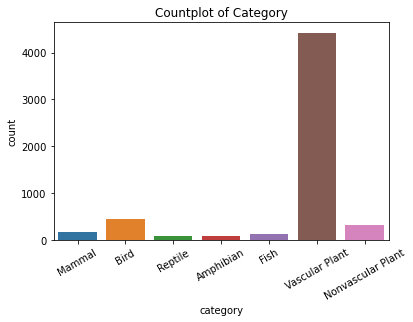

In [54]:
sns.countplot(data=df2, x="category") 
plt.title('Countplot of Category') 
plt.xticks(rotation=30)
plt.show()

##### most of the Null values comes from the vacular plan followed by bird